In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [5]:
df = pd.read_csv(filepath_or_buffer='uk_real_estate.csv',
                 names=['transaction_id', 'price', 'date_of_transfer', 'postcode', 'type', 'old/new',
                        'duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District', 
                        'County', 'PPDCategory_Type','Record_Status - monthly_file_only'],
                 parse_dates=['date_of_transfer']).drop(columns=['postcode', 'PAON', 'SAON', 'Street', 'Locality', 'Town/City', 'District', 'County'])

df['year'] = df['date_of_transfer'].dt.year
df.head()

,transaction_id,price,date_of_transfer,type,old/new,duration,PPDCategory_Type,Record_Status - monthly_file_only,year
0,{F887F88E-7D15-4415-804E-52EAC2F10958},70000,1995-07-07,D,N,F,A,A,1995
1,{40FD4DF2-5362-407C-92BC-566E2CCE89E9},44500,1995-02-03,T,N,F,A,A,1995
2,{7A99F89E-7D81-4E45-ABD5-566E49A045EA},56500,1995-01-13,T,N,F,A,A,1995
3,{28225260-E61C-4E57-8B56-566E5285B1C1},58000,1995-07-28,T,N,F,A,A,1995
4,{444D34D7-9BA6-43A7-B695-4F48980E0176},51000,1995-06-28,S,N,F,A,A,1995


In [6]:
years = df['year'].value_counts().sort_index()
years

year
1995     796889
1996     965081
1997    1094246
1998    1050306
1999    1194681
2000    1129173
2001    1245641
2002    1351596
2003    1235241
2004    1231722
2005    1061260
2006    1325879
2007    1272132
2008     649549
2009     625208
2010     663207
2011     661126
2012     668809
2013     810871
2014     984659
2015    1010416
2016    1045377
2017    1065840
2018    1035342
2019    1007770
2020     882717
2021    1220166
2022     862421
2023     128903
Name: count, dtype: int64

In [66]:
hourly_transactions = years / (365*24)
hourly_transactions

year
1995     90.969064
1996    110.169064
1997    124.913927
1998    119.897945
1999    136.379110
2000    128.901027
2001    142.196461
2002    154.291781
2003    141.009247
2004    140.607534
2005    121.148402
2006    151.356050
2007    145.220548
2008     74.149429
2009     71.370776
2010     75.708562
2011     75.471005
2012     76.348059
2013     92.565183
2014    112.403995
2015    115.344292
2016    119.335274
2017    121.671233
2018    118.189726
2019    115.042237
2020    100.766781
2021    139.288356
2022     98.449886
2023     14.714954
Name: count, dtype: float64

In [73]:
df_hourly = pd.DataFrame(hourly_transactions).transpose()
df_hourly.head()

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,90.969064,110.169064,124.913927,119.897945,136.37911,128.901027,142.196461,154.291781,141.009247,140.607534,...,112.403995,115.344292,119.335274,121.671233,118.189726,115.042237,100.766781,139.288356,98.449886,14.714954


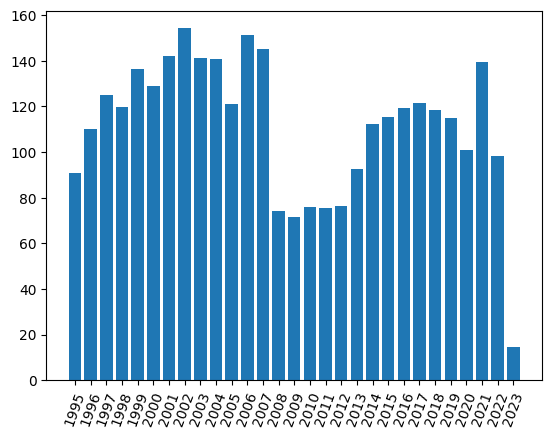

In [74]:
plt.bar(hourly_transactions.index, hourly_transactions.values)
plt.xticks([value for value in hourly_transactions.index], rotation=70)
plt.show()

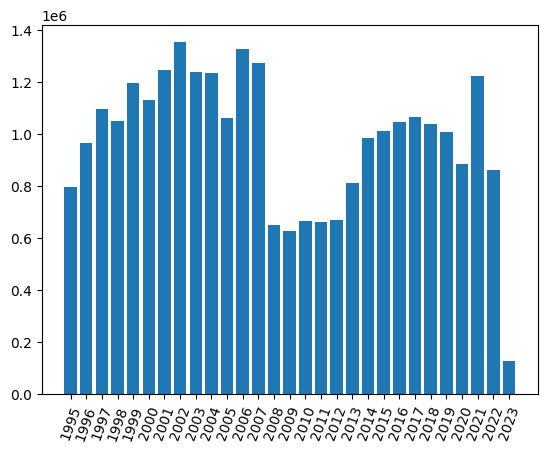

In [7]:
plt.bar(years.index, years.values)
plt.xticks([value for value in years.index], rotation=70)
plt.show()

In [8]:
df_years = pd.DataFrame(years).transpose()
df_years

year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,796889,965081,1094246,1050306,1194681,1129173,1245641,1351596,1235241,1231722,...,984659,1010416,1045377,1065840,1035342,1007770,882717,1220166,862421,128903


In [30]:
df_before_crisis = df_years.loc[:, (df_years.columns.astype(int) >= 1996) & (df_years.columns.astype(int) < 2008)]
lambda_before = df_before_crisis.mean(axis=1).values[0]
print(f'Average sales per year before 2008 crisis: {lambda_before}')
df_before_crisis

Average sales per year before 2008 crisis: 1179746.5


year,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,965081,1094246,1050306,1194681,1129173,1245641,1351596,1235241,1231722,1061260,1325879,1272132


In [31]:
df_crisis = df_years.loc[:, (df_years.columns.astype(int) >= 2008) & (df_years.columns.astype(int) <= 2012)]
lambda_crisis = df_crisis.mean(axis=1).values[0]
print(f'Average sales per year during 2008 crisis: {lambda_crisis}')
df_crisis

Average sales per year during 2008 crisis: 653579.8


year,2008,2009,2010,2011,2012
count,649549,625208,663207,661126,668809


In [54]:
n = 100000
prob = st.poisson.cdf(lambda_crisis/n, lambda_before/n)

# Compute the probability of observing exactly the crisis average using the pre-crisis rate
exact_prob = st.poisson.pmf(lambda_crisis, lambda_before)

print(f"Probability of observing {lambda_crisis} or fewer sales given the pre-crisis rate: {prob:.4f}")
print(f"Probability of observing exactly {lambda_crisis} sales given the pre-crisis rate: {exact_prob:.4f}")

Probability of observing 653579.8 or fewer sales given the pre-crisis rate: 0.0513
Probability of observing exactly 653579.8 sales given the pre-crisis rate: 0.0000


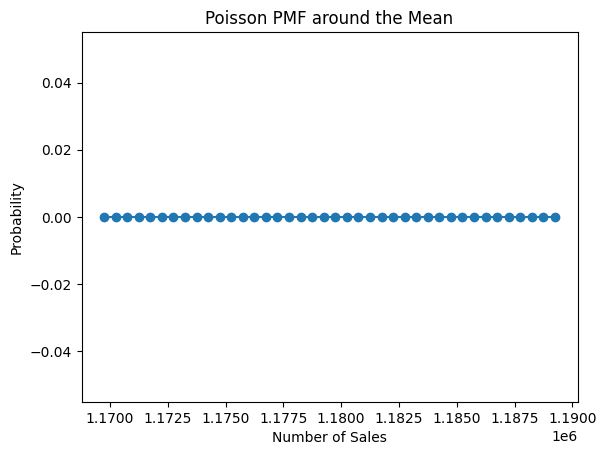

In [46]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

lambda_before = 1179746.5

# Values around the mean
values = np.arange(lambda_before - 10000, lambda_before + 10000, 500)
probs = [poisson.pmf(value, lambda_before) for value in values]

plt.plot(values, probs, marker='o')
plt.xlabel('Number of Sales')
plt.ylabel('Probability')
plt.title('Poisson PMF around the Mean')
plt.show()

In [47]:
import numpy as np
from scipy.special import gammaln  # This provides log factorial

def log_poisson_pmf(k, lambda_):
    return k * np.log(lambda_) - lambda_ - gammaln(k + 1)

lambda_before = 1179746.5
values = np.arange(lambda_before - 10000, lambda_before + 10000, 500)
log_probs = [log_poisson_pmf(value, lambda_before) for value in values]
probs = np.exp(log_probs)

for val, prob in zip(values, probs):
    print(f"Value: {val}, Probability: {prob:.10f}")


Value: 1169746.5, Probability: 0.0000000000
Value: 1170246.5, Probability: 0.0000000000
Value: 1170746.5, Probability: 0.0000000000
Value: 1171246.5, Probability: 0.0000000000
Value: 1171746.5, Probability: 0.0000000000
Value: 1172246.5, Probability: 0.0000000000
Value: 1172746.5, Probability: 0.0000000000
Value: 1173246.5, Probability: 0.0000000000
Value: 1173746.5, Probability: 0.0000000001
Value: 1174246.5, Probability: 0.0000000010
Value: 1174746.5, Probability: 0.0000000091
Value: 1175246.5, Probability: 0.0000000682
Value: 1175746.5, Probability: 0.0000004144
Value: 1176246.5, Probability: 0.0000020355
Value: 1176746.5, Probability: 0.0000080835
Value: 1177246.5, Probability: 0.0000259580
Value: 1177746.5, Probability: 0.0000674089
Value: 1178246.5, Probability: 0.0001415714
Value: 1178746.5, Probability: 0.0002404834
Value: 1179246.5, Probability: 0.0003304346
Value: 1179746.5, Probability: 0.0003672956
Value: 1180246.5, Probability: 0.0003303045
Value: 1180746.5, Probability: 0

In [10]:
for num in range(len(years.columns)//5):
    grouper = 0
    for period in range(0,6):
        
        

SyntaxError: incomplete input (2639085190.py, line 5)

In [ ]:
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

df['Year Recorded'] = df['Date Recorded'].dt.year
df['Year Recorded'] = df['Year Recorded'].convert_dtypes(int)

df['Month Recorded'] = df['Date Recorded'].dt.month
df['Month Recorded'] = df['Month Recorded'].convert_dtypes(int)
# df['Month Recorded'] = df['Date Recorded'].dt.month

len(df)

997213

In [ ]:
years = df['Year Recorded'].value_counts().sort_index()
years

Year Recorded
1999        1
2001    14291
2002    60207
2003    56317
2004    73943
2005    79566
2006    57250
2007    46138
2008    34195
2009    36305
2010    39128
2011    32088
2012    32568
2013    37513
2014    41941
2015    48894
2016    47611
2017    48493
2018    47165
2019    52622
2020    62534
2021    48441
Name: count, dtype: Int64

In [ ]:
months = df['Month Recorded'].value_counts().sort_index()
months
months.describe()

count            12.0
mean     83100.916667
std       15349.62961
min           55024.0
25%          75228.25
50%           84572.0
75%           91370.5
max          103461.0
Name: count, dtype: Float64

In [ ]:
df.groupby(['column1', 'column2']).mean()
